In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [3]:
df = pd.read_csv(r'C:\Users\JOSUE\Downloads\hackathon\real_state_limpio.csv')
df1 = pd.read_csv(r'C:\Users\JOSUE\Downloads\hackathon\Accidentes_incidencias_limpio.csv')

# Merging Datos

In [4]:
merged_df = df.merge(df1, on=['codi_barri', 'codi_districte'], how='left')

# 'merged_df' ahora contendrá el resultado de la combinación


In [5]:
merged_df .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 34 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   trimestre                                584 non-null    int64  
 1   codi_districte                           584 non-null    int64  
 2   codi_barri                               584 non-null    int64  
 3   precio_log10                             584 non-null    float64
 4   numero_expedient                         584 non-null    int64  
 5   carrer_encoded                           584 non-null    int64  
 6   Accidentes_Distrito                      584 non-null    int64  
 7   Accidentes_Barrio                        584 non-null    int64  
 8   Accidentes_Calle                         584 non-null    int64  
 9   Altres                                   584 non-null    int64  
 10  Avançament defectuós/improcedent         584 non-n

In [6]:
merged_df .shape

(584, 34)

In [7]:
merged_df .head(5)

,trimestre,codi_districte,codi_barri,precio_log10,numero_expedient,carrer_encoded,Accidentes_Distrito,Accidentes_Barrio,Accidentes_Calle,Altres,...,Dijous,Dilluns,Dimarts,Dimecres,Dissabte,Diumenge,Divendres,Matí,Nit,Tarda
0,1,1,1,2.866281,179,447,685,179,11,38,...,27,18,33,20,24,20,37,58,34,87
1,1,1,2,2.956773,184,298,685,184,66,39,...,32,30,18,24,21,26,33,66,35,83
2,1,1,3,2.859006,162,770,685,162,139,26,...,33,25,16,29,15,20,24,55,23,84
3,1,1,4,2.951959,160,1050,685,160,10,21,...,29,16,31,18,17,18,31,64,22,74
4,1,2,5,2.940058,288,380,3203,288,449,35,...,42,43,37,50,22,34,60,116,36,136


In [8]:
merged_df.duplicated().sum()

19

In [9]:
merged_df = merged_df.drop_duplicates()


In [10]:
merged_df.isnull().sum()

trimestre                                  0
codi_districte                             0
codi_barri                                 0
precio_log10                               0
numero_expedient                           0
carrer_encoded                             0
Accidentes_Distrito                        0
Accidentes_Barrio                          0
Accidentes_Calle                           0
Altres                                     0
Avançament defectuós/improcedent           0
Canvi de carril sense precaució            0
Desconegut                                 0
Desobeir altres senyals                    0
Desobeir semàfor                           0
Envair calçada contrària                   0
Fallada mecànica o avaria                  0
Gir indegut o sense precaució              0
Manca precaució efectuar marxa enrera      0
Manca precaució incorporació circulació    0
No determinada                             0
No respectar distàncies                    0
Manca de a

In [11]:
merged_df.duplicated().sum()

0

Empezamos con aplicar el PCA pero primero escalamos nuestros datos

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(merged_df)

Nuestros datos escalados

In [14]:
X_scaled

array([[-1.34179996, -1.86235643, -1.69141038, ..., -0.04987969,
         0.89584867,  0.15464604],
       [-1.34179996, -1.86235643, -1.64417596, ...,  0.0714638 ,
         0.94946673,  0.1047958 ],
       [-1.34179996, -1.86235643, -1.59694154, ..., -0.0953835 ,
         0.30605   ,  0.11725836],
       ...,
       [ 1.34338414,  1.34675318,  1.6149993 , ...,  0.20797522,
        -0.17651256, -0.09460517],
       [ 1.34338414,  1.34675318,  1.66223372, ..., -0.3077346 ,
        -0.49822092, -0.45601944],
       [ 1.34338414,  1.34675318,  1.70946815, ..., -0.4745819 ,
        -0.28374868, -0.48094456]])

Aplicamos nuestro PCA

'''# Por ejemplo, aquí se elige mantener 20 componentes principales pero en la 
grafica del codo claramente se ve en 10 a llegado al 95% , escogi 20 para que se pueda apreciar la curva'''

Dato a a recordar el shape de nuestrto merged_df es de 584/34 y aca ya lo reducimos a 20

In [15]:
n_components = 20 
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)


En palabras simples explained_variance te dice cuanto porciento de infromacion cada variable adquirio por ejemplo de lado izquierdo a derecho podemos apreciar que las variables 0,1,2 retuvieron mas informacion y entre mas vamos continuando la retencion va disminuyendo , pero Tambien Nuestro objetivo con el PCA es disminuir nuestra dimensionalidad features desde este punto nosotros podemos poner solo las nuevas variables que pensemos que nos conviene

In [16]:
explained_variance = pca.explained_variance_ratio_
explained_variance


array([0.68452656, 0.05132921, 0.04326841, 0.03790207, 0.02951277,
       0.02802756, 0.02618451, 0.01872471, 0.01614143, 0.01387983,
       0.01053682, 0.00781552, 0.00671999, 0.00600839, 0.00404119,
       0.00342402, 0.00178586, 0.00158917, 0.00144618, 0.00126074])

In [17]:
cumulative_explained_variance = np.cumsum(explained_variance)


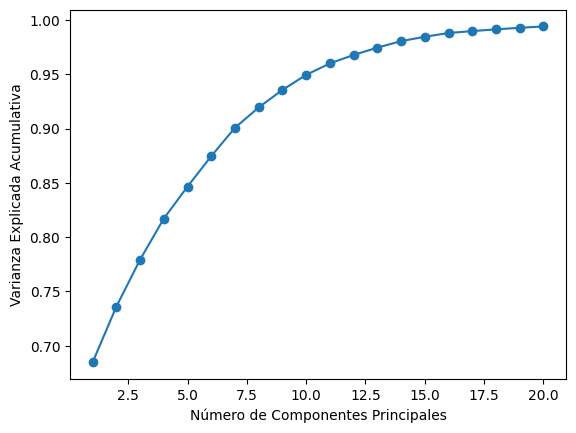

In [18]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.show()


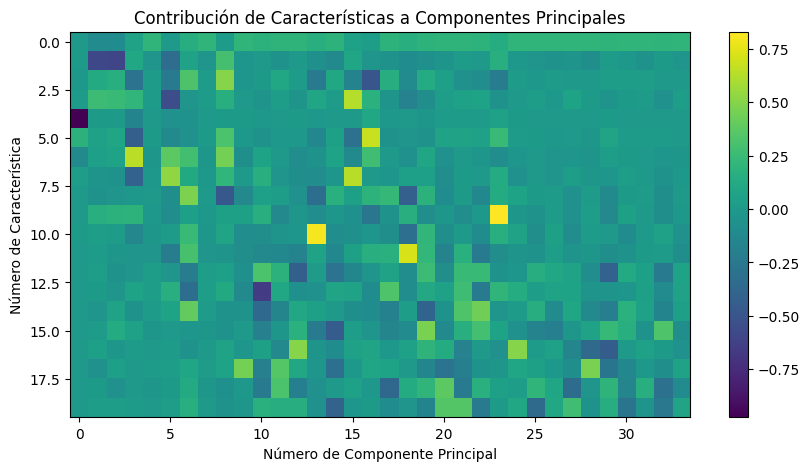

In [19]:
import matplotlib.pyplot as plt

# Obtener los componentes principales
components = pca.components_

# Graficar la contribución de características a los componentes
plt.figure(figsize=(10, 5))
plt.imshow(components, cmap='viridis', aspect='auto')
plt.colorbar()
plt.xlabel('Número de Componente Principal')
plt.ylabel('Número de Característica')
plt.title('Contribución de Características a Componentes Principales')
plt.show()


En la siguiente grafica de barras podemos visualizar las nuevas variables y cuales contienen informacion valiosa y cuales no

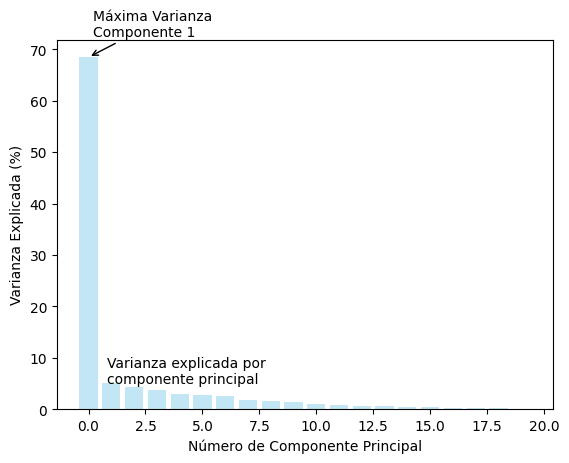

In [20]:
import matplotlib.pyplot as plt

# Calcula la varianza explicada en porcentaje
explained_variance_percent = explained_variance * 100

# Bar plot
plt.bar(range(n_components), explained_variance_percent, alpha=0.5, align='center', color='skyblue')

# Etiquetas y título
plt.xlabel('Número de Componente Principal')
plt.ylabel('Varianza Explicada (%)')
plt.title('')

# Anotación para el componente con mayor varianza
max_variance_index = np.argmax(explained_variance)
plt.annotate(f'Máxima Varianza\nComponente {max_variance_index + 1}', (max_variance_index, explained_variance_percent[max_variance_index]), xytext=(3, 15), textcoords='offset points', arrowprops=dict(arrowstyle="->"))

# Leyenda explicativa
plt.text(0.8, 5, 'Varianza explicada por\ncomponente principal', fontsize=10)

# Muestra la gráfica
plt.show()


Este es otro ejemplo donde solo pongo 2 variables y otra visualizacion entre la variable target en un heatmap entre mas intenso el color mas la 

In [21]:
from sklearn.decomposition import PCA
# Realizar PCA
n_components = 2  #  número de componentes principales
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(X_scaled)  #  conjunto de datos escalado


Extraje 2 columnas que retienen la mayoria de informacion, a este proceso es que se le llama reduccion dimensional(PCA)

In [22]:
data_pca

array([[ 1.50896408,  2.60158177],
       [ 1.36143295,  2.27985291],
       [ 0.6408687 ,  2.37038336],
       ...,
       [-0.2781659 , -2.29302572],
       [-2.22812908, -0.31882305],
       [-2.41318286, -2.15489047]])

In [23]:
pca.explained_variance_

array([23.31516898,  1.74828744])

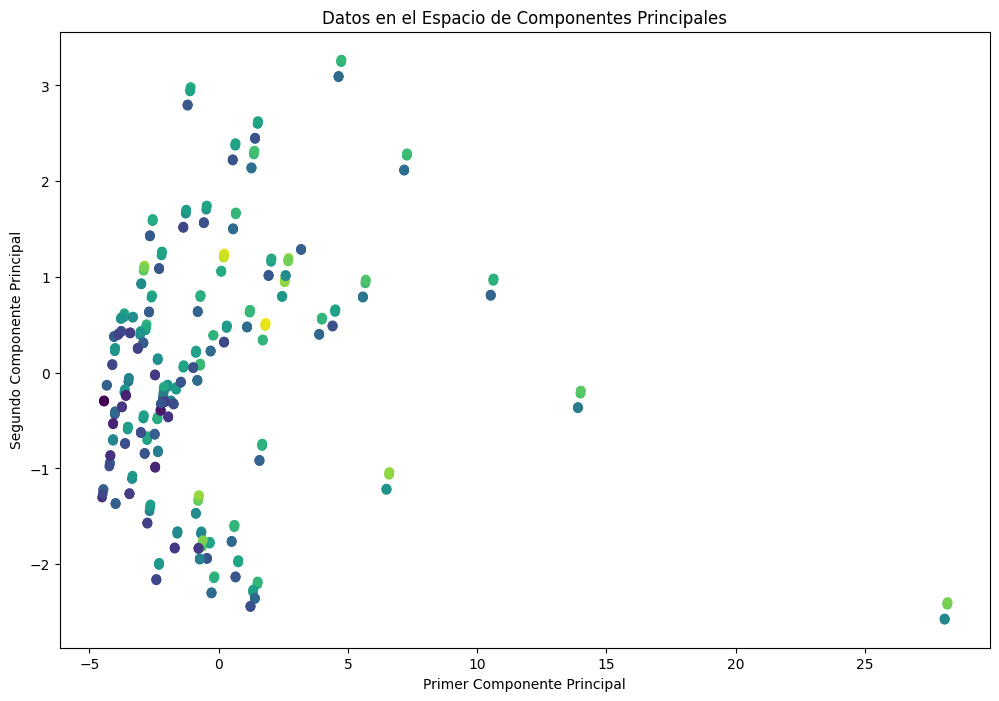

In [28]:
plt.figure(figsize=(12, 8))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=merged_df['precio_log10'], cmap='viridis')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.title('Datos en el Espacio de Componentes Principales')
plt.show()


